Goal: predict next basket products. 
include: 
* building feature: I built 18 features
* feature selection: selected 10 best features
* implenmenting models: logistic regression, xgboost model(this notebook) and gradient boosting(notebook: next_purchase_prediction_lgb)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.plotly as py
%matplotlib inline
from matplotlib.pylab import rcParams

import seaborn as sns 

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier 

#from sklearn.model_selection import RandomizedSearchCV

import statsmodels

import statsmodels.api as sm
import statsmodels.formula.api as smf

import xgboost

import pickle

from pandas.plotting import scatter_matrix

from scipy.sparse import csr_matrix

import patsy as pt
from patsy import dmatrices


import pickle

from xgboost import XGBClassifier
#from pygam import PoissonGAM
#from pygam.utils import generate_X_grid

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [5]:
pd.set_option("display.max_rows",500)

In [7]:
prior = pd.read_csv('/Users/mengruiyin/Desktop/project/prior.csv')

In [8]:
prior_data_da = pd.read_csv('/Users/mengruiyin/Desktop/project/prior_data_da.csv')

In [7]:
prior_data_da.head(100)

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,soy lactosefree
2,2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,snacks,popcorn jerky
3,3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky
4,4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
5,5,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
6,6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,snacks,nuts seeds dried fruit
7,7,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,snacks,popcorn jerky
8,8,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,produce,fresh fruits
9,9,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky


In [9]:
train = pd.read_csv('/Users/mengruiyin/Desktop/project/train.csv')
train_data_da = pd.read_csv('/Users/mengruiyin/Desktop/project/tran_data_da.csv')

In [10]:
prior_data_da.head(100)

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,soy lactosefree
2,2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,snacks,popcorn jerky
3,3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky
4,4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
5,5,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
6,6,2398795,1,prior,2,3,7,15.0,10258,2,0,Pistachios,117,19,snacks,nuts seeds dried fruit
7,7,2398795,1,prior,2,3,7,15.0,12427,3,1,Original Beef Jerky,23,19,snacks,popcorn jerky
8,8,2398795,1,prior,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,produce,fresh fruits
9,9,2398795,1,prior,2,3,7,15.0,26088,5,1,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky


## Build Features

user information: 4 features including information collected based on every user
* order_number: the total number customers made purchase
* unique_product: number of unique products the customer has purcahsed
* total_product: number of products the customers has purchased (some products could be purchased repeatedly by the same customer)
* average_days_since_prior_order: the mean of values  of variable days_since_prior_order for the same user; derived by grouping by 'user_id' and days_since_prior_order.mean()

product information: 9 features including information collected based on every product
* total_number: total number of times the product has been purchased
* reorder_number: number of times the product has been reordered
* order_dow(mode): the mode of order day of the product; derived by grouping by product_name and taking order_dow.mode()
* order_hour(mode): the mode of order hour of the product; derived by grouping by product_name and taking order_hour_of_day.mode()
* aisle_id: the aisle of the product
* department_id: the department of the product
* add_to_cart_order_mean: the mean of the variable 'add_to_cart_order' of the product; derived by grouping by product_name and taking 'add_to_cart_order'.mean()
* recency_Mean: find whether the product has been ordered recently. Use the order_number of the product of the user divided by the total order number of the user; returned 0 or 1 for each product of each user as 'recency'; the final recency_Mean values are derived by grouping product_name and taking recency.mean() 
* lastnorders_mean: finding the product of the user is purchased at last N orders. Use total order number the user minus the order_number of the product of the user, return values as 'lastNorders'. The 'lastnorders_mean' values are derived by grouping by product_name and taking 'lastNorders' mean.  

user and product information: 5 features
* days_since_prior_order: the days since last order of the most recent order of the user and product; derived by grouping by user_id and product_name and finding the most recent value of the variable days_since_prior_order
* order_day: the order day of the most recent purcahse of the user and the product; derived by grouping by user_id and product_name and finding the most recent value of order_dow
* order_hour_or_day: the order hour of the most recent purcahse of the user and the product; derived by grouping by user_id and product_name and finding the most recent value of order_hour_of_day
* add_to_cart_order: mean value of add_to_cart_order of the user and the product; derived by grouping by user_id and product_name and taking add_to_cart_order.mean()
* purchase_number: the purcahse number of the product of the user; derived by grouping by user_id and product_name and taking order_id.count()

Total is 18 features

### user information

In [130]:
user_info = pd.DataFrame()
user_info['order_number'] = prior_data_da.groupby('user_id')['order_number'].max()
user_info['unique_product'] = prior_data_da.groupby(['user_id'])['product_name'].unique().map(len)
user_info['total_product'] = prior_data_da.groupby('user_id').size()
user_info['average_days_since_prior_order'] = prior_data_da.groupby('user_id').days_since_prior_order.mean()
#user_info['unique_product'] = prior_data_da.groupby('user_id').size()

In [131]:
user_info.head()

,order_number,unique_product,total_product,average_days_since_prior_order
user_id,,,,
1,10,18,59,20.259259
2,14,102,195,15.967033
3,12,33,88,11.487179
4,5,17,18,15.357143
5,4,23,37,14.500000


In [132]:
user_info.to_csv('user_info.csv')

In [9]:
user_info = pd.read_csv('user_info.csv')

### product information

In [101]:
product_dow = pd.DataFrame(prior_data_da.groupby(['product_name', 'order_dow'])\
                           ['order_id'].unique().map(len)).\
                           reset_index()

In [105]:
product_hour = pd.DataFrame(prior_data_da.groupby(['product_name', 'order_hour_of_day'])\
                           ['order_id'].unique().map(len)).\
                           reset_index()

In [103]:
idx = product_dow.groupby(['product_name'])['order_id'].transform(max) == product_dow['order_id']

In [108]:
idx2 = product_hour.groupby(['product_name'])['order_id'].transform(max) == product_hour['order_id']

In [ ]:
maxPriorOrder=pd.DataFrame(user_info['order_number'])
priorsXorders=prior_data_da.merge(maxPriorOrder,how='left',left_on='user_id',right_index=True)
priorsXorders['recency']=(priorsXorders['order_number_x']/priorsXorders['order_number_y']).astype(np.float32)

In [163]:
priorsXorders['lastNOrder']=priorsXorders['order_number_y']-priorsXorders['order_number_x']

,Unnamed: 0,order_id,user_id,eval_set,order_number_x,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,order_number_y,recency,lastNOrder
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks,10,0.1,9
1,1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,dairy eggs,soy lactosefree,10,0.1,9
2,2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,snacks,popcorn jerky,10,0.1,9
3,3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,snacks,popcorn jerky,10,0.1,9
4,4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods,10,0.1,9


In [140]:
product_info = pd.DataFrame()
product_info['total_number'] = prior_data_da.groupby('product_name').size()
product_info['reorder_number'] = prior_data_da.groupby('product_name')['reordered'].sum()
product_info['order_dow(mode)'] = product_dow[idx].groupby(['product_name'])['order_dow'].mean()
product_info['order_hour(mode)'] = product_hour[idx2].groupby(['product_name'])['order_hour_of_day'].mean()
product_info['aisle_id'] = prior_data_da[['product_name', 'aisle_id']].\
                            drop_duplicates('product_name').\
                            set_index('product_name').\
                            reindex(product_info.index)
product_info['department_id'] = prior_data_da[['product_name', 'department_id']].\
                            drop_duplicates('product_name').\
                            set_index('product_name').\
                            reindex(product_info.index)

In [164]:
product_info['add_to_cart_order_mean'] = prior_data_da.groupby(['product_name'])['add_to_cart_order'].mean()
product_info['recency_Mean']=priorsXorders.groupby('product_name')['recency'].mean()
product_info['lastnorders_mean'] = priorsXorders.groupby('product_name')['lastNOrder'].mean()

In [166]:
product_info.head(100)

,total_number,reorder_number,order_dow(mode),order_hour(mode),aisle_id,department_id,add_to_cart_order_mean,recency_Mean,lastnorders_mean
product_name,,,,,,,,,
#2 Coffee Filters,777,257,1.000000,15.000000,26,7,9.257400,0.536521,17.407979
#2 Cone White Coffee Filters,13,3,3.333333,9.000000,26,7,7.384615,0.537064,12.769231
#2 Mechanical Pencils,8,0,2.500000,10.000000,87,17,7.750000,0.522477,18.875000
#4 Natural Brown Coffee Filters,241,89,0.000000,11.000000,26,7,10.701245,0.567304,13.319502
& Go! Hazelnut Spread + Pretzel Sticks,164,87,2.000000,17.000000,88,13,11.554878,0.594459,12.975610
'Swingtop' Premium Lager,1,0,0.000000,19.000000,27,5,5.000000,1.000000,0.000000
(70% Juice!) Mountain Raspberry Juice Squeeze,28,16,6.000000,12.000000,98,7,7.785714,0.247342,31.428571
+Energy Black Cherry Vegetable & Fruit Juice,29,11,1.000000,9.000000,31,7,6.724138,0.504840,15.827586
".5\"" Waterproof Tape",8,0,0.000000,9.000000,118,11,7.875000,0.435343,13.625000


Based on previous plot, products have different order pattern of order day. Every product has its own highest order day. So I groupby product and order day to check order number of order day and get mode day. If the product has multiple days with the highest order number, I take mean. Same as order hour for products.

In [167]:
product_info.to_csv('product_info.csv')

In [11]:
product_info = pd.read_csv('product_info.csv')

### user and product information

In [168]:
user_product = pd.DataFrame(prior_data_da.groupby(['user_id', 'product_name']).
                            agg({'days_since_prior_order': lambda x: tuple(x)[-1], 
                                 'order_dow': lambda x: tuple(x)[-1],
                                 'order_hour_of_day':lambda x: tuple(x)[-1],
                                 'add_to_cart_order': lambda x: x.mean()}))

In [15]:
purchase_number = pd.DataFrame(prior_data_da.groupby(['user_id', 'product_name'], as_index = False)['order_id'].count())

In [170]:
user_product.to_csv('user_product3.csv')

In [33]:
user_product = pd.read_csv('user_product3.csv')

In [36]:
user_product.set_index(['user_id', 'product_name'], inplace = True)

### combine all information

In [13]:
add_user = user_product.merge(user_info, on = 'user_id')

In [180]:
add_user.head()

,user_id,product_name,add_to_cart_order,order_hour_of_day,order_dow,days_since_prior_order,order_number,unique_product,total_product,average_days_since_prior_order
0,1,0% Greek Strained Yogurt,4.000000,8,4,30.0,10,18,59,20.259259
1,1,Aged White Cheddar Popcorn,4.500000,7,3,15.0,10,18,59,20.259259
2,1,Bag of Organic Bananas,6.000000,15,4,28.0,10,18,59,20.259259
3,1,Bartlett Pears,7.000000,15,4,28.0,10,18,59,20.259259
4,1,Cinnamon Toast Crunch,6.333333,8,4,30.0,10,18,59,20.259259


In [181]:
product_info.head()

,total_number,reorder_number,order_dow(mode),order_hour(mode),aisle_id,department_id,add_to_cart_order_mean,recency_Mean,lastnorders_mean
product_name,,,,,,,,,
#2 Coffee Filters,777,257,1.000000,15.0,26,7,9.257400,0.536521,17.407979
#2 Cone White Coffee Filters,13,3,3.333333,9.0,26,7,7.384615,0.537064,12.769231
#2 Mechanical Pencils,8,0,2.500000,10.0,87,17,7.750000,0.522477,18.875000
#4 Natural Brown Coffee Filters,241,89,0.000000,11.0,26,7,10.701245,0.567304,13.319502
& Go! Hazelnut Spread + Pretzel Sticks,164,87,2.000000,17.0,88,13,11.554878,0.594459,12.975610


In [16]:
feature = add_user.merge(product_info, on = 'product_name').\
          merge(purchase_number, on = ['user_id', 'product_name'])

In [17]:
assert feature.shape[0] == add_user.shape[0] == user_product.shape[0]

In [18]:
print feature.shape, add_user.shape, user_product.shape

(13307953, 20) (13307953, 10) (13307953, 6)


## Build Label

In [19]:
train_data_da = pd.read_csv('/Users/mengruiyin/Desktop/project/tran_data_da.csv', index_col = 0)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:472: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [193]:
train_product = feature[feature['user_id'].isin(train_data_da.user_id)]

In [194]:
i1 = train_product.set_index(['user_id', 'product_name']).index
i2 = train_data_da.set_index(['user_id', 'product_name']).index
# temp = train_product[i1.isin(i2)]

In [195]:
train_product['label'] = np.where(i1.isin(i2),1,0)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [234]:
train_product.head(100)

,order_hour_of_day,order_dow,days_since_prior_order,user_id,product_name,purchase_number,label
0,8,4,30.0,1,0% Greek Strained Yogurt,1,1
1,7,2,15.0,1,Aged White Cheddar Popcorn,2,1
2,7,3,28.0,1,Bag of Organic Bananas,2,0
3,15,4,28.0,1,Bartlett Pears,1,0
4,7,1,30.0,1,Cinnamon Toast Crunch,3,1
5,12,3,21.0,1,Creamy Almond Butter,1,0
6,15,4,28.0,1,Honeycrisp Apples,1,0
7,8,4,30.0,1,Milk Chocolate Almonds,1,1
8,15,4,28.0,1,Organic Fuji Apples,1,0
9,14,1,0.0,1,Organic Half & Half,2,1


In [196]:
train_product.set_index(['user_id', 'product_name'], inplace = True)

In [197]:
train_product = train_product.fillna(0)

In [198]:
train_product.to_csv('train_product2.csv')

In [204]:
train_product.shape

(8474661, 19)

In [20]:
train_product = pd.read_csv('train_product2.csv')

In [21]:
train_product.set_index(['user_id', 'product_name'], inplace = True)

## Data Exploration

In [199]:
train_product['label'].value_counts()

0    7645837
1     828824
Name: label, dtype: int64

In [29]:
7645837/ 828824

9

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



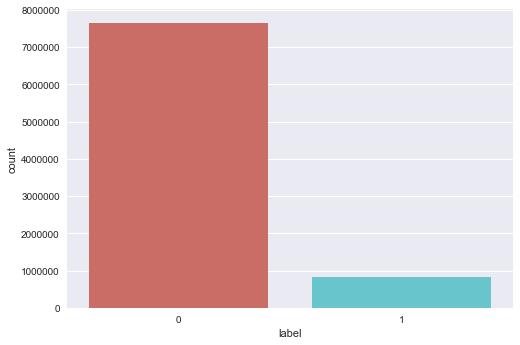

In [239]:
sns.countplot(x = 'label', data = train_product, palette = 'hls')
plt.show()

## Implementing the model

### split data to train and test set

I split data into training dataset and test dataset with 70% and 30% respectively. The training data has 5932262

In [23]:
train_set, test_set = train_test_split(train_product, test_size=0.3, random_state=42)

In [24]:
train_set = train_set.rename(columns = {'order_id':'purchase_number'})
test_set = test_set.rename(columns = {'order_id':'purchase_number'})                                       

In [25]:
train_set.shape

(5932262, 19)

In [26]:
test_set.shape

(2542399, 19)

In [32]:
train_set.to_csv('train_set.csv')

In [33]:
test_set.to_csv('test_set.csv')

In [7]:
train_set = pd.read_csv('train_set.csv')

In [8]:
test_set = pd.read_csv('test_set.csv')

In [9]:
train_set.set_index(['user_id', 'product_name'], inplace = True)

In [10]:
test_set.set_index(['user_id', 'product_name'], inplace = True)

In [12]:
train_set.head()

,,add_to_cart_order,order_hour_of_day,order_dow,days_since_prior_order,order_number,unique_product,total_product,average_days_since_prior_order,total_number,reorder_number,order_dow(mode),order_hour(mode),aisle_id,department_id,add_to_cart_order_mean,recency_Mean,lastnorders_mean,purchase_number,label
user_id,product_name,,,,,,,,,,,,,,,,,,,
36196,Dark Chocolate Soft Serve Fruit Pops,4.000000,2,5,1.0,21,96,165,13.253165,323,183,0.0,16.0,37,1,8.272446,0.523142,19.235294,1,0
3202,Sweet Red Grape Tomatoes,23.000000,14,4,0.0,3,70,78,26.111111,3268,1374,0.0,11.0,83,4,8.803856,0.486750,12.194308,1,1
21490,Baby Gold & White Corn,42.000000,17,0,30.0,4,89,112,17.623762,58,14,6.0,12.0,116,1,12.189655,0.640313,6.603448,1,0
10000,Unsalted Pure Irish Butter,6.666667,9,5,4.0,72,256,1092,4.949580,19846,13153,0.0,14.0,36,16,7.153583,0.536157,17.080772,9,0
162176,Organic Mint Mélange Herbal Tea,13.000000,16,2,21.0,10,64,117,23.701923,537,204,1.0,10.0,94,7,10.428305,0.579827,16.137803,1,0


In [13]:
test_set.head()

,,add_to_cart_order,order_hour_of_day,order_dow,days_since_prior_order,order_number,unique_product,total_product,average_days_since_prior_order,total_number,reorder_number,order_dow(mode),order_hour(mode),aisle_id,department_id,add_to_cart_order_mean,recency_Mean,lastnorders_mean,purchase_number,label
user_id,product_name,,,,,,,,,,,,,,,,,,,
192911,Grilled Chicken Breast Strips,6.0,8,2,30.0,5,31,72,28.375000,6673,4191,0.0,13.0,49,12,9.128128,0.577827,13.979769,1,1
145634,Chicken Noodle Soup,16.0,10,2,7.0,44,186,486,8.559072,4196,1938,0.0,11.0,1,20,8.500477,0.548080,14.766921,1,0
5207,Regular,4.0,9,2,4.0,7,25,32,2.322581,2287,1202,1.0,11.0,77,7,7.406646,0.489007,14.230870,1,1
170525,Favorites Super Moist Butter Recipe Yellow Cake Mix,19.0,14,5,0.0,5,79,99,17.728814,250,40,1.0,10.0,105,13,10.072000,0.530185,11.232000,1,0
61874,Seasonal Blood Orange Yoghurt,7.0,10,5,4.0,89,273,745,4.319783,285,137,1.0,13.0,120,16,10.894737,0.421048,17.852632,1,0


### Feature Selection

In [17]:
data_vars = train_set.columns.values.tolist()
y = ['label']
X = [i for i in data_vars if i not in y]
train_feature = train_set[X]

In [256]:
test_feature = test_set[X]

In [225]:
X

['add_to_cart_order',
 'order_hour_of_day',
 'order_dow',
 'days_since_prior_order',
 'order_number',
 'unique_product',
 'total_product',
 'average_days_since_prior_order',
 'total_number',
 'reorder_number',
 'order_dow(mode)',
 'order_hour(mode)',
 'aisle_id',
 'department_id',
 'add_to_cart_order_mean',
 'recency_Mean',
 'lastnorders_mean',
 'purchase_number']

feature selection:
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [78]:
logreg3 = LogisticRegression()
# select 10 features
rfe3 = RFE(logreg3, 1)
rfe3 = rfe3.fit(train_set[X], train_set[y])
print(rfe3.support_)
print(rfe3.ranking_)

[False False False False False False False False False False False False
 False False False  True False False]
[12 15  9  7  6 13 14  8 18 17  4 11 16 10  2  1  5  3]


In [81]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), rfe3.ranking_), X))

Features sorted by their rank:
[(1.0, 'recency_Mean'), (2.0, 'add_to_cart_order_mean'), (3.0, 'purchase_number'), (4.0, 'order_dow(mode)'), (5.0, 'lastnorders_mean'), (6.0, 'order_number'), (7.0, 'days_since_prior_order'), (8.0, 'average_days_since_prior_order'), (9.0, 'order_dow'), (10.0, 'department_id'), (11.0, 'order_hour(mode)'), (12.0, 'add_to_cart_order'), (13.0, 'unique_product'), (14.0, 'total_product'), (15.0, 'order_hour_of_day'), (16.0, 'aisle_id'), (17.0, 'reorder_number'), (18.0, 'total_number')]


According to rfe result, the most important feature selecteed is 'recency_Mean', which represents the mean value of product that has been purchased recently. The variable provides information about recent purchase. Recent orders should play more important role for predicting next basket purcahse, so the selected feature makes sense.

In [37]:
logreg2 = LogisticRegression()
# select 10 features
rfe2 = RFE(logreg2, 10)
rfe2 = rfe2.fit(train_set[X], train_set[y])
print(rfe2.support_)
print(rfe2.ranking_)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[False False  True  True  True False False  True False False  True False
 False  True  True  True  True  True]
[3 6 1 1 1 4 5 1 9 8 1 2 7 1 1 1 1 1]


In [153]:
importance = rfe2.estimator_.coef_[0]

In [126]:
feature_importance = pd.DataFrame({'features': ['order_dow','days_since_prior_order',
                     'order_number','average_days_since_prior_order',
                     'order_dow(mode)','department_id','add_to_cart_order_mean',
                     'recency_Mean','lastnorders_mean', 'purchase_number'],
     'importance': importance}).sort_values('importance', ascending = False)

In [151]:
feature_importance['color'] = np.where(feature_importance.importance < 0, 'red', 'green')
feature_importance

,features,importance,color
7,recency_Mean,5.473187,green
9,purchase_number,0.196532,green
8,lastnorders_mean,0.041870,green
1,days_since_prior_order,0.015364,green
5,department_id,-0.007555,red
0,order_dow,-0.008570,red
3,average_days_since_prior_order,-0.010590,red
2,order_number,-0.039622,red
4,order_dow(mode),-0.077538,red
6,add_to_cart_order_mean,-0.155594,red


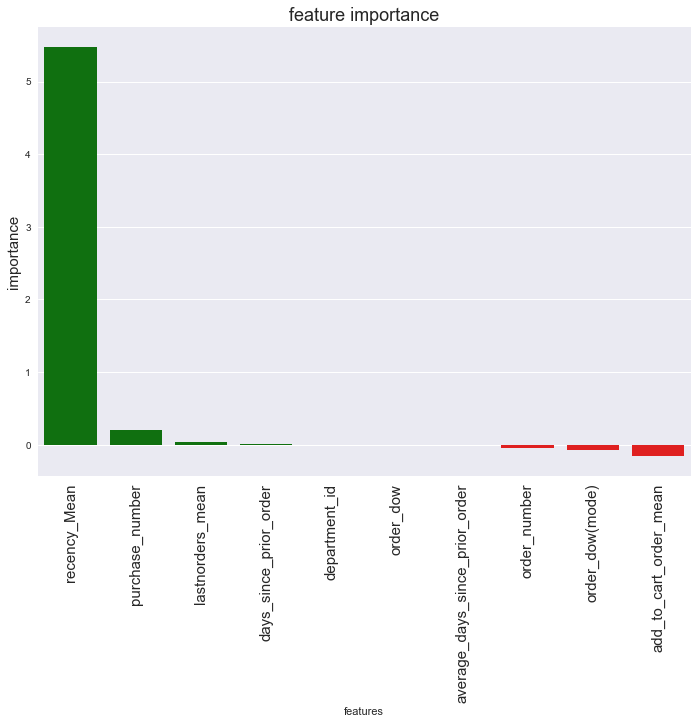

In [152]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax = sns.barplot(x="features", y="importance", palette = feature_importance.color, data=feature_importance)
plt.xticks(rotation=90, size = 15)
plt.ylabel('importance', size = 15)
plt.title('feature importance', size = 18)

In [213]:
logreg = LogisticRegression()
# select 10 features
rfe = RFE(logreg, 10)
rfe = rfe.fit(train_set[X], train_set[y])
print(rfe.support_)
print(rfe.ranking_)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[False False  True  True  True False False  True False False  True  True
 False  True  True  True False  True]
[2 6 1 1 1 3 4 1 9 8 1 1 7 1 1 1 5 1]


In [18]:
cols = ['order_dow', 'days_since_prior_order', 'order_number', 'average_days_since_prior_order',
       'reorder_number','order_dow(mode)', 'department_id','add_to_cart_order_mean', 'recency_Mean',
       'purchase_number']
s_feature_train = train_set[cols]
y_train = train_set['label']

In [19]:
s_feature_test = test_set[cols]
y_test = test_set['label']

### Logistic Regression

####  treat department as categorical

In [38]:
dummy_department_train = pd.get_dummies(s_feature_train['department_id'], prefix='department_id')

In [39]:
dummy_department_test = pd.get_dummies(s_feature_test['department_id'], prefix='department_id')

In [40]:
s_feature_train2 = s_feature_train.reset_index().merge(dummy_department_train.reset_index(),\
                    on = ['user_id', 'product_name']).drop(columns = ['department_id'])

In [41]:
s_feature_train2.set_index(['user_id', 'product_name'], inplace = True)

In [42]:
s_feature_test2 = s_feature_test.reset_index().merge(dummy_department_test.reset_index(),\
                    on = ['user_id', 'product_name']).drop(columns = ['department_id'])

In [43]:
s_feature_test2.set_index(['user_id', 'product_name'], inplace = True)

In [44]:
s_feature_train2.to_csv('s_feature_train2.csv')

In [45]:
s_feature_test2.to_csv('s_feature_test2.csv')

In [14]:
s_feature_train2 = pd.read_csv('s_feature_train2.csv')
s_feature_test2 = pd.read_csv('s_feature_test2.csv')

In [15]:
s_feature_test2.set_index(['user_id', 'product_name'], inplace = True)
s_feature_train2.set_index(['user_id', 'product_name'], inplace = True)

In [287]:
logreg_cat = LogisticRegression(class_weight='balanced')
logreg_cat.fit(s_feature_train2, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [289]:
y_fit_cat = logreg_cat.predict(s_feature_train2)

In [290]:
cfm_log_cat = confusion_matrix(y_train.values,y_fit_cat)
print(cfm_log_cat)

[[4014463 1338284]
 [ 195293  384222]]


In [291]:
print(classification_report(y_train.values, y_fit_cat))

             precision    recall  f1-score   support

          0       0.95      0.75      0.84   5352747
          1       0.22      0.66      0.33    579515

avg / total       0.88      0.74      0.79   5932262



In [302]:
y_pred_cat = logreg_cat.predict(s_feature_test2)

In [304]:
cfm_log_cat_test = confusion_matrix(y_test.values,y_pred_cat)
print(cfm_log_cat_test)

[[1720243  572847]
 [  84245  165064]]


In [306]:
print(classification_report(y_test.values, y_pred_cat))

             precision    recall  f1-score   support

          0       0.95      0.75      0.84   2293090
          1       0.22      0.66      0.33    249309

avg / total       0.88      0.74      0.79   2542399



The f1-score for test data with 10 selected features is 0.33.

## Xgboost

In [20]:
train_set2 = s_feature_train2.copy()
train_set2['label'] = y_train

In [21]:
test_set2 = s_feature_test2.copy()
test_set2['label'] = y_test

In [22]:
train_set2['weight'] = np.where(train_set2['label'] == 1,9,1)

In [23]:
test_set2['weight'] = np.where(test_set2['label'] == 1,9,1)

scale_pos_weight: Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative cases) / sum(positive cases) 

In [30]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=100,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

In [32]:
xgb.fit(s_feature_train2, y_train, sample_weight = train_set2['weight'],verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [33]:
filename = 'xgboost2.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [35]:
y_xgboost = xgb.predict(s_feature_test2)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [37]:
cfm_xgb = confusion_matrix(y_test.values,y_xgboost)
print(cfm_xgb)

[[1708894  584196]
 [  74753  174556]]


In [38]:
print(classification_report(y_test.values, y_xgboost))

             precision    recall  f1-score   support

          0       0.96      0.75      0.84   2293090
          1       0.23      0.70      0.35    249309

avg / total       0.89      0.74      0.79   2542399



#### n_estimators = 300

In [25]:
xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=300,
    max_depth=4, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27)

In [26]:
xgb3.fit(s_feature_train2, y_train, sample_weight = train_set2['weight'],verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [27]:
y_xgb3_fit = xgb3.predict(s_feature_train2)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [28]:
cfm_xgb3_fit = confusion_matrix(y_train.values,y_xgb3_fit)
print(cfm_xgb3_fit)

[[3988181 1364566]
 [ 172998  406517]]


In [29]:
print(classification_report(y_train.values, y_xgb3_fit))

             precision    recall  f1-score   support

          0       0.96      0.75      0.84   5352747
          1       0.23      0.70      0.35    579515

avg / total       0.89      0.74      0.79   5932262



In [30]:
y_xgb3_pred = xgb3.predict(s_feature_test2)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [31]:
cfm_xgb3_pred = confusion_matrix(y_test.values,y_xgb3_pred)
print(cfm_xgb3_pred)

[[1708751  584339]
 [  74590  174719]]


In [32]:
print(classification_report(y_test.values, y_xgb3_pred))

             precision    recall  f1-score   support

          0       0.96      0.75      0.84   2293090
          1       0.23      0.70      0.35    249309

avg / total       0.89      0.74      0.79   2542399



The f1 score of test data has been improved to 0.35 from 0.33 by xgboost.

#### Tune n_estimators

In [44]:
param = {
 'n_estimators':range(100,1000,100)
}

In [ ]:
learning_rate =0.1, n_estimators=100,
    max_depth=5, min_child_weight=1, gamma=0,subsample=0.8,colsample_bytree=0.8,
    objective= 'binary:logistic', nthread=4,scale_pos_weight=1,seed=27

In [45]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param, scoring='f1',n_jobs=4,iid=False, cv=5)

In [46]:
gsearch1.fit(s_feature_train2,y_train)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. 

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. 

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [50]:
gsearch1.best_params_

{'n_estimators': 300}

#### Tune max_depth 

In [17]:
param2 = {
 'max_depth':[4,5,6,7]
}

In [20]:
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators = 300,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param2, scoring='f1',n_jobs=4,iid=False, cv=5)

In [27]:
gsearch2.fit(s_feature_train2,y_train)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. 

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [4, 5, 6, 7]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='f1', verbose=0)

In [28]:
gsearch2.best_params_

{'max_depth': 4}

In [29]:
# param3 = {
#  'learning_rate':[0.01,0.05,0.1]
# }

In [30]:
# gsearch3 = GridSearchCV(estimator = XGBClassifier( n_estimators = 300, max_depth = 4,
#  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
#  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
#  param_grid = param3, scoring='f1',n_jobs=4,iid=False, cv=5)

In [ ]:
# gsearch3.fit(s_feature_train2,y_train)

/Users/mengruiyin/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

